# 1 Data Preprocessing



In [1]:
import pandas as pd 


mouse = pd.read_csv('Testdaten_Mouse.csv', delimiter=";")
touch = pd.read_csv("Testdaten_Touchpad.csv", delimiter=";")

print(mouse.head())
print(touch.head())

print(mouse.info())

   ID    AVG
0   1  264,8
1   2    308
2   3  392,8
3   4  572,8
4   5    756
   ID    AVG
0   1  307,8
1   2  307,1
2   3  396,9
3   4  526,4
4   5  717,2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      30 non-null     int64 
 1   AVG     30 non-null     object
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes
None


In [2]:
mouse['AVG'] = mouse['AVG'].str.replace(",", ".")
print(mouse.head())

   ID    AVG
0   1  264.8
1   2    308
2   3  392.8
3   4  572.8
4   5    756


In [3]:
touch['AVG'] = touch['AVG'].str.replace(",", ".")
print(touch.head())

   ID    AVG
0   1  307.8
1   2  307.1
2   3  396.9
3   4  526.4
4   5  717.2


In [4]:
mouse['AVG'] = mouse['AVG'].astype(float)
print(mouse.info())
print(mouse)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30 non-null     int64  
 1   AVG     30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes
None
    ID    AVG
0    1  264.8
1    2  308.0
2    3  392.8
3    4  572.8
4    5  756.0
5    6  774.4
6    1  193.6
7    2  272.8
8    3  300.8
9    4  449.6
10   5  518.4
11   6  810.4
12   1  183.2
13   2  257.7
14   3  386.4
15   4  449.6
16   5  608.5
17   6  614.8
18   1  516.8
19   2  488.0
20   3  540.8
21   4  603.2
22   5  656.0
23   6  712.8
24   1  361.1
25   2  273.2
26   3  452.8
27   4  521.6
28   5  592.8
29   6  700.0


In [5]:
touch['AVG'] = touch['AVG'].astype(float)
print(touch.info())
print(touch)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30 non-null     int64  
 1   AVG     30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes
None
    ID     AVG
0    1   307.8
1    2   307.1
2    3   396.9
3    4   526.4
4    5   717.2
5    6   857.9
6    1   275.3
7    2   324.7
8    3   345.3
9    4   476.3
10   5   690.0
11   6   727.1
12   1   391.1
13   2   483.7
14   3   532.3
15   4   670.4
16   5   883.1
17   6  1028.4
18   1   245.9
19   2   302.2
20   3   548.4
21   4   661.2
22   5   820.9
23   6   870.6
24   1   263.1
25   2   391.6
26   3   525.9
27   4   577.1
28   5   702.4
29   6   968.3


# 2 Korrelationskoeffizient & Bestimmtheitsmaß
Korrelationskoeffizient nach Pearson berechnen sowie das Bestimmtheitsmaß für den Zusammenhang ID zu durchschnittliche Messzeit. Interpretieren.

. Koeffizienten der Regressionsgraden bestimmen

In [6]:
import numpy as np
import matplotlib.pyplot as plt 
corr_mouse = np.corrcoef(mouse['ID'], mouse['AVG'])[0, 1]
corr_touch = np.corrcoef(touch['ID'], touch['AVG'])[0, 1]

print(corr_mouse, '\n',corr_touch) # * Korrelationskoeffizienz

0.8633773277811395 
 0.9289729361862555


In [7]:
# * Bestimmtheitsmaß
r_2_mouse = corr_mouse * corr_mouse
r_2_touch = corr_touch * corr_touch

print(f'Bestimmtheitsmaß von mouse: {r_2_mouse}, \nBestimmheitsmaß von touchpad: {r_2_touch}')

Bestimmtheitsmaß von mouse: 0.7454204101265012, 
Bestimmheitsmaß von touchpad: 0.8629907161665128


## Interpretation

Die Korrelationskoeffizient zwischen der Benutzer-ID und der für die Mausbedienung erforderlichen Zeit beträgt 0,8634, was nahe bei 1 liegt und darauf hinweist, dass zwischen ihnen eine starke positive Korrelation besteht. Dies könnte bedeuten, dass mit zunehmender Benutzer-ID auch die für die Durchführung der Operation erforderliche Zeit entsprechend zunimmt. Der Bestimmtheitskoeffizient zwischen den beiden beträgt 0,7454, was darauf hinweist, dass etwa 74,54% der Variation durch die lineare Beziehung zwischen der Benutzer-ID und der für die Mausbedienung erforderlichen Zeit erklärt werden können. Dies zeigt, dass die Benutzer-ID eine starke erklärungsfähige Kraft für die Variation der für die Durchführung der Operation erforderlichen Zeit hat.


Es gibt auch eine starke positive Korrelation zwischen der ID und der Zeit, die ein Benutzer benötigt, um eine Aktion über das Touchpad abzuschließen, mit einem Korrelationskoeffizienten von 0,93, und etwa 86,3 % der Varianz kann erklärt werden. Diese Korrelation wird auch in den beiden folgenden Streudiagrammen gut dargestellt.


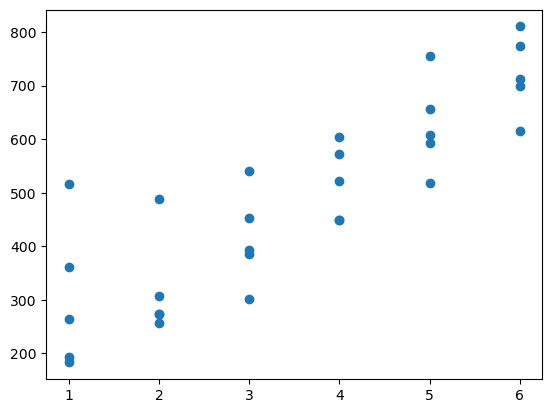

In [8]:
# scatter plot of mouse data
plt.scatter(mouse['ID'], mouse['AVG'])
plt.show()

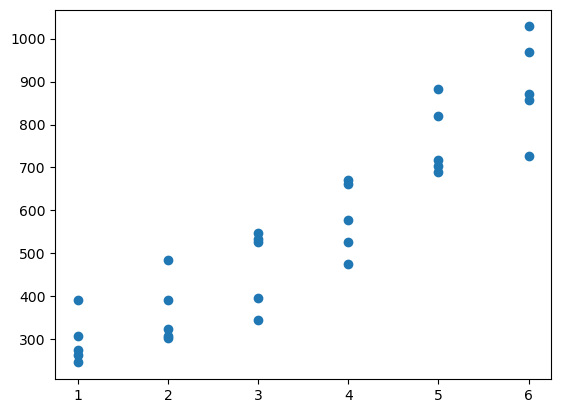

In [9]:
plt.scatter(touch['ID'], touch['AVG'])
plt.show()

# 3 Koeffizienten der Korrelationsgraden bestimmen



In [10]:
from sklearn.linear_model import LinearRegression
X_mouse = mouse['ID'].values.reshape(-1, 1)
y_mouse = mouse['AVG'].values.reshape(-1, 1)

reg_mouse = LinearRegression()
reg_mouse.fit(X_mouse, y_mouse)

print(reg_mouse.intercept_, reg_mouse.coef_)


[172.78266667] [[89.04971429]]


In [11]:
X_touch = touch['ID'].values.reshape(-1, 1)
y_touch = touch['AVG'].values.reshape(-1, 1)

reg_touch = LinearRegression()
reg_touch.fit(X_touch, y_touch)

print(reg_touch.intercept_, reg_touch.coef_)

[132.2] [[122.40571429]]


# 4 t-Statistiken

 t-Statistiken berechnen und Signifikanz der Regression
anhand der t-Verteilungstabelle für 𝛼 = 0,05 bewerten

## 1) am beispeil von mouse

$H_0: $ Es besteht kein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit

$H_1: $ Es besteht ein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit

Ergebnis der Herleitung:

$$
t_{n-2} = \frac{b_1*\sqrt{n-2}}{\sqrt{\frac{\sum{(y_i-\widehat{y})^2}}{\sum{(x_i - \overline{x})^2}}}}
$$

In [12]:
from scipy.stats import ttest_rel
import pandas as pd

t_stat, p_value = ttest_rel(mouse['ID'], mouse['AVG'])
print(f't-statistik: {t_stat}, \np_value: {p_value}')


t-statistik: -14.827744093129287, 
p_value: 4.5231783617616224e-15


In [14]:
# mouse

print('Hypothese Mouse:')
print('H0: Es besteht kein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit')
print('H1: Es besteht ein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit')

alpha = 0.05
if p_value < alpha:
    print('\nVerwerfe H0, Es besteht ein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit')
else :
    print('\nWir können H0 nicht verwerfen.')

Hypothese Mouse:
H0: Es besteht kein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit
H1: Es besteht ein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit

Verwerfe H0, Es besteht ein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit


In [15]:
# touchpad

t_stat, p_value = ttest_rel(touch['ID'], touch['AVG'])
print(f't-statistik: {t_stat}, \np_value: {p_value}')

print('Hypothese Touchpad:')
print('H0: Es besteht kein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit')
print('H1: Es besteht ein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit')

alpha = 0.05
if p_value < alpha:
    print('\nVerwerfe H0, Es besteht ein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit')
else :
    print('\nWir können H0 nicht verwerfen.')

t-statistik: -13.426929517137019, 
p_value: 5.6403514174441023e-14
Hypothese Touchpad:
H0: Es besteht kein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit
H1: Es besteht ein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit

Verwerfe H0, Es besteht ein signifikanter Zusammenhang zwischen der Benutzer-ID und der für den Abschluss des Vorgangs benötigten Zeit
